# 📘 Capstone Project: Lease Agreement Legal Assistant using Gemini

This project is submitted as part of the **5-day Gen AI Intensive Course with Google** (March 31 - April 4, 2025).  
The goal is to demonstrate the use of **Generative AI** to extract structured information from rental agreement documents.

We use Gemini Pro via the Google Generative AI API to extract key fields such as landlord, tenant, rent, dates, and more.

**GenAI Capabilities Demonstrated:**
- 📄 Document Understanding
- 🧠 Structured Output (JSON)
- ✍️ Prompt Engineering / Controlled Generation

## 📂 Step 1: Load the Dataset

We begin by loading `.docx` rental agreements from a Kaggle dataset. These documents contain various styles of lease contracts with different formats and language styles.


## 📄 Step 2: Extract Text from Lease Documents

We use the `docx2txt` Python package to extract raw text from each `.docx` file.  
This plain text serves as the input to our Gemini model for downstream processing.


## 🤖 Step 3: Extract Lease Info using Gemini

We construct a prompt that clearly asks Gemini to return a specific JSON structure with lease information.  
The key fields we extract include landlord/tenant names, property address, lease dates, rent, deposit, and policy clauses.

## 🛡️ Step 4: Handle Gemini Output Safely

Sometimes, Gemini returns responses with markdown formatting (like ```json).  
To ensure valid JSON parsing, we use a regular expression (`re.search`) to extract the JSON block from the response before loading it.

## 🔄 Step 5: Process a Sample of 3 Documents

To avoid hitting API limits and to showcase functionality, we process only 3 sample lease documents.  
Each one is passed to Gemini, and the structured response is collected.

## 💾 Step 6: Save the Results to CSV

Finally, we compile all extracted data into a Pandas DataFrame and save it as `lease_info_sample_3.csv`.  
This CSV is the structured output that could be used in downstream workflows, dashboards, or legal systems.



# Add the conclusion markdown cell again
conclusion_markdown = new_markdown_cell("""
### 📌 Conclusion & Limitations

This project demonstrates how **Generative AI** can automate the understanding of legal lease agreements.  
By leveraging capabilities like **document understanding**, **structured JSON output**, and **prompt engineering**, we turn unstructured rental agreements into clean, machine-readable data.



### 🔍 Key Accomplishments:
- 📄 Extracted structured data from `.docx` lease documents
- 🤖 Used Gemini to return clean JSON fields like rent, start date, landlord, etc.
- 💬 Added an **interactive Q&A agent** where users can ask natural language questions about a selected lease agreement



### ⚠️ Limitations:

- ⚙️ Gemini's output sometimes includes formatting (like ```json), which requires regex cleanup
- 🧠 Some responses may contain hallucinated or partial values
- ✂️ Lease documents are trimmed to 1000–1500 characters to avoid token limits
- 🚫 If a lease doesn’t include a detail (e.g., pet policy), Gemini may guess or return "null"
- 📉 JSON parsing can fail if Gemini doesn't strictly follow the requested format



### 🔮 Next Steps (Future Improvements):

- 🔄 Expand to process full dataset (43+ documents) using batching and retry handling
- 🤖 Convert Q&A into a **chatbot experience** (e.g., Gradio/Streamlit)
- 📊 Visualize structured lease data (e.g., monthly rent trends, lease durations)
- 🧩 Add document upload functionality for new leases
- 🔍 Explore fine-tuned models or agent-like behavior for clause comparison
""")

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lease-dataset/170499354-Anand-Nagar-Agreement.pdf.docx
/kaggle/input/lease-dataset/216973836-Rental-Agreement-Sample.pdf.docx
/kaggle/input/lease-dataset/269137702-Rental-Agreement.pdf.docx
/kaggle/input/lease-dataset/63793679-Rental-Agreement.pdf.docx
/kaggle/input/lease-dataset/175488575-House-Rental-Agreement.pdf.docx
/kaggle/input/lease-dataset/323828497-Rental-Agreement-Micky.pdf.docx
/kaggle/input/lease-dataset/63057680-Rental-Agreement.pdf.docx
/kaggle/input/lease-dataset/62126501-Rental-Agreement.pdf.docx
/kaggle/input/lease-dataset/269135973-Udaya-Rental-Agreement.pdf.docx
/kaggle/input/lease-dataset/77112358-Jaggu-Rental-Agreemnt.pdf.docx
/kaggle/input/lease-dataset/343492954-Rent-Agreement-3E.pdf.docx
/kaggle/input/lease-dataset/142106117-Rental-Agreement.pdf.docx
/kaggle/input/lease-dataset/116950326-December-2012-Rental-Agreement.pdf.docx
/kaggle/input/lease-dataset/251798216-Rental-Agreement-Format1.pdf.docx
/kaggle/input/lease-dataset/56736420-Rental-Agreem

In [2]:
!pip install google-generativeai pypdf docx2txt

In [3]:
!pip install PyPDF2 docx2txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.9 MB/s eta 0:00:00a 0:00:01


In [4]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("GOOGLE_API_KEY")

In [5]:
import os

for dirname, dirnames, filenames in os.walk('/kaggle/input'):
    print("Directory:", dirname)
    print("Subdirectories:", dirnames)
    print("Files:", filenames)
    print("-" * 40)


Directory: /kaggle/input
Subdirectories: ['lease-dataset']
Files: []
----------------------------------------
Directory: /kaggle/input/lease-dataset
Subdirectories: []
Files: ['170499354-Anand-Nagar-Agreement.pdf.docx', '216973836-Rental-Agreement-Sample.pdf.docx', '269137702-Rental-Agreement.pdf.docx', '63793679-Rental-Agreement.pdf.docx', '175488575-House-Rental-Agreement.pdf.docx', '323828497-Rental-Agreement-Micky.pdf.docx', '63057680-Rental-Agreement.pdf.docx', '62126501-Rental-Agreement.pdf.docx', '269135973-Udaya-Rental-Agreement.pdf.docx', '77112358-Jaggu-Rental-Agreemnt.pdf.docx', '343492954-Rent-Agreement-3E.pdf.docx', '142106117-Rental-Agreement.pdf.docx', '116950326-December-2012-Rental-Agreement.pdf.docx', '251798216-Rental-Agreement-Format1.pdf.docx', '56736420-Rental-Agreement.pdf.docx', '62144960-Rental-Agreement.pdf.docx', '36199312-Rental-Agreement.pdf.docx', '392810415-RENT-AGREEMENT.pdf.docx', '95421373-Agreement.pdf.docx', '47854715-RENTAL-AGREEMENT.pdf.docx', '500

In [6]:
import os

documents = []

for dirname, _, filenames in os.walk('/kaggle/input/lease-dataset'):
    for filename in filenames:
        if filename.endswith('.docx'):  # All your files are .docx
            documents.append(os.path.join(dirname, filename))

print(f"Found {len(documents)} documents.")


Found 43 documents.


In [7]:
!pip install docx2txt

In [8]:
import docx2txt

def extract_text(file_path):
    try:
        return docx2txt.process(file_path)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

# Load all document texts
document_texts = [extract_text(path) for path in documents]


In [9]:
!pip install google-generativeai

In [10]:
!pip install -U google-generativeai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.9 MB/s eta 0:00:0000:01
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.10
    Uninstalling google-ai-generativelanguage-0.6.10:
      Successfully uninstalled google-ai-generativelanguage-0.6.10
  Attempting uninstall: google-generativeai
    Found existing installation: google-generativeai 0.8.3
    Uninstalling google-generativeai-0.8.3:
      Successfully uninstalled google-generativeai-0.8.3


In [11]:
import google.generativeai as genai
from kaggle_secrets import UserSecretsClient

# Load Gemini key securely
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("GOOGLE_API_KEY")

# Configure
genai.configure(api_key=api_key)

# Check available models
models = genai.list_models()

for m in models:
    print(m.name)


models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01

In [12]:
model = genai.GenerativeModel(model_name="models/gemini-1.5-pro")  # ✅ WORKS


In [13]:
import re
import json

def extract_lease_info(text):
    prompt = f"""
You are an AI trained to extract lease agreement details. Respond ONLY with valid JSON. Do NOT include explanations, markdown, or comments.

Extract the following fields:
- landlord_name
- tenant_name
- property_address
- lease_start_date
- lease_end_date
- monthly_rent
- security_deposit
- pet_policy
- early_termination_clause

Return the response in this exact format:

{{
  "landlord_name": "",
  "tenant_name": "",
  "property_address": "",
  "lease_start_date": "",
  "lease_end_date": "",
  "monthly_rent": "",
  "security_deposit": "",
  "pet_policy": "",
  "early_termination_clause": ""
}}

Lease Agreement:
{text[:1000]}
"""
    try:
        response = model.generate_content(prompt)
        json_match = re.search(r"\{.*\}", response.text, re.DOTALL)
        if json_match:
            return json.loads(json_match.group())
        else:
            raise ValueError("JSON not found in Gemini output.")
    except Exception as e:
        print("❌ Invalid response:", e)
        print("🔎 Raw Gemini output:")
        print(response.text)
        return None


In [14]:
results = []
sample_docs = document_texts[:3]

for i, doc_text in enumerate(sample_docs):
    print(f"Processing document {i+1}/{len(sample_docs)}")
    if doc_text.strip():
        lease_data = extract_lease_info(doc_text)
        if lease_data:
            results.append(lease_data)

df = pd.DataFrame(results)
df.to_csv("lease_info_sample_3.csv", index=False)
print("✅ Saved extracted lease info to lease_info_sample_3.csv")
df.head()


Processing document 1/3
Processing document 2/3
Processing document 3/3
✅ Saved extracted lease info to lease_info_sample_3.csv


,landlord_name,tenant_name,property_address,lease_start_date,lease_end_date,monthly_rent,security_deposit,pet_policy,early_termination_clause
0,Mrs. PADMAVATI,Mrs. SANGHAMITRA PARIDA,"154/2, Ground floor, 9th Cross, Byrasandra Mai...",2012-04-05,,8000,60000,,
1,Mr.Kamal,Mr.V.Arun Kumar,"Old No.97, Kanda Swamy Ko",March 22nd 2013,None,None,None,None,None
2,Mr .GiddappA S/o late Na^ippa,Ms Pottumurthi Udayaiaxmi W/o Ran** Krishna ic...,D No.134 2nd cross Srvinthi L/o RamAmurthynaga...,1/4/2015,None,None,"40,000/-",None,None


## 💬 Interactive Q&A on Lease Agreements

In this section, we allow users to ask questions about a specific lease agreement.  
The system uses the Gemini model to answer questions based on the selected document's content.

In [20]:
# Prepare lease selector and question box
import ipywidgets as widgets
from IPython.display import display

# Sample document selector (first 3 leases only)
lease_selector = widgets.Dropdown(
    options=[(f"Lease {i+1}", i) for i in range(len(document_texts[:10]))],
    description='Select Lease:',
    style={'description_width': 'initial'}
)

question_box = widgets.Text(
    value='What is the monthly rent?',
    placeholder='Ask a question about the lease...',
    description='Your Question:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)

display(lease_selector, question_box)

Dropdown(description='Select Lease:', options=(('Lease 1', 0), ('Lease 2', 1), ('Lease 3', 2), ('Lease 4', 3),…

Text(value='What is the monthly rent?', description='Your Question:', layout=Layout(width='80%'), placeholder=…

In [25]:
# Define function to send Q&A prompt to Gemini
def ask_lease_question(doc_text, question):
    prompt = f"""
You are a legal assistant. Based on the following rental agreement, answer the user's question.

Rental Agreement:
{doc_text[:1500]}

Question:
{question}

Only answer based on the information in the agreement. If the answer isn't present, say "Not mentioned in the agreement."
"""
    response = model.generate_content(prompt)
    return response.text.strip()


In [26]:
# Run the live Q&A using selected lease and question
selected_index = lease_selector.value
selected_text = document_texts[selected_index]
question = question_box.value

answer = ask_lease_question(selected_text, question)
print(f"🔍 Answer: {answer}")

🔍 Answer: Not mentioned in the agreement.


✅ Try it Out
Select a lease agreement from the dropdown.
Type your question (e.g., "When does the lease start?")
Click the cell below to run and 
get an AI-generated answer from Gemini.

In [39]:
from datetime import datetime, timedelta
import pandas as pd

# Helper function to compute next rent due date
def calculate_next_rent_due(start_date_str):
    try:
        start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
        today = datetime.today()
        while start_date <= today:
            start_date += timedelta(days=30)
        return start_date.strftime("%Y-%m-%d")
    except:
        return None

# Load CSV and apply due date logic
df = pd.read_csv("lease_info_sample_3.csv")
df['next_rent_due'] = df['lease_start_date'].apply(calculate_next_rent_due)

In [40]:
from datetime import datetime
from IPython.display import display
# Remove rows with missing due dates
filtered_df = df[df['next_rent_due'].notna()]

# Show top 3 valid upcoming rents
upcoming_df = filtered_df.sort_values("next_rent_due").head(3)

print("🔍 Top 3 Tenants with Upcoming Rent Due:")
print(upcoming_df[['tenant_name', 'property_address', 'next_rent_due', 'monthly_rent']].to_string(index=False))


🔍 Top 3 Tenants with Upcoming Rent Due:
            tenant_name                                                                     property_address next_rent_due  monthly_rent
Mrs. SANGHAMITRA PARIDA 154/2, Ground floor, 9th Cross, Byrasandra Main Road, G M Palya, Bangalore - 560 075    2025-04-27        8000.0


In [41]:

from kaggle_secrets import UserSecretsClient
import requests

user_secrets = UserSecretsClient()
SENDGRID_API_KEY = user_secrets.get_secret("SENDGRID_API_KEY")

def send_email(to_email, subject, body):
    url = "https://api.sendgrid.com/v3/mail/send"
    headers = {
        "Authorization": f"Bearer {SENDGRID_API_KEY}",
        "Content-Type": "application/json"
    }
    data = {
        "personalizations": [{
            "to": [{"email": to_email}]
        }],
        "from": {"email": "umreddy23@icloud.com"},
        "subject": subject,
        "content": [{
            "type": "text/plain",
            "value": body
        }]
    }

    response = requests.post(url, headers=headers, json=data)
    return response.status_code, response.text

In [42]:
 #Simulate sending emails — replace example@example.com with real emails if available
for _, row in upcoming_df.iterrows():
    name = row['tenant_name']
    rent = row['monthly_rent']
    due = row['next_rent_due']
    address = row['property_address']

    to_email = "umreddy23@gmail.com"  # Replace with actual tenant email mapping
    subject = f"Rent Due Reminder for {name}"
    body = f"Hello {name},\n\nThis is a reminder that your rent of ₹{rent} is due by {due} for the property at:\n{address}\n\nPlease make the payment at your earliest convenience.\n\nThank you."

    status, msg = send_email(to_email, subject, body)
    print(f"📧 Email sent to {name}: {status} - {msg}")

📧 Email sent to Mrs. SANGHAMITRA PARIDA: 202 - 


[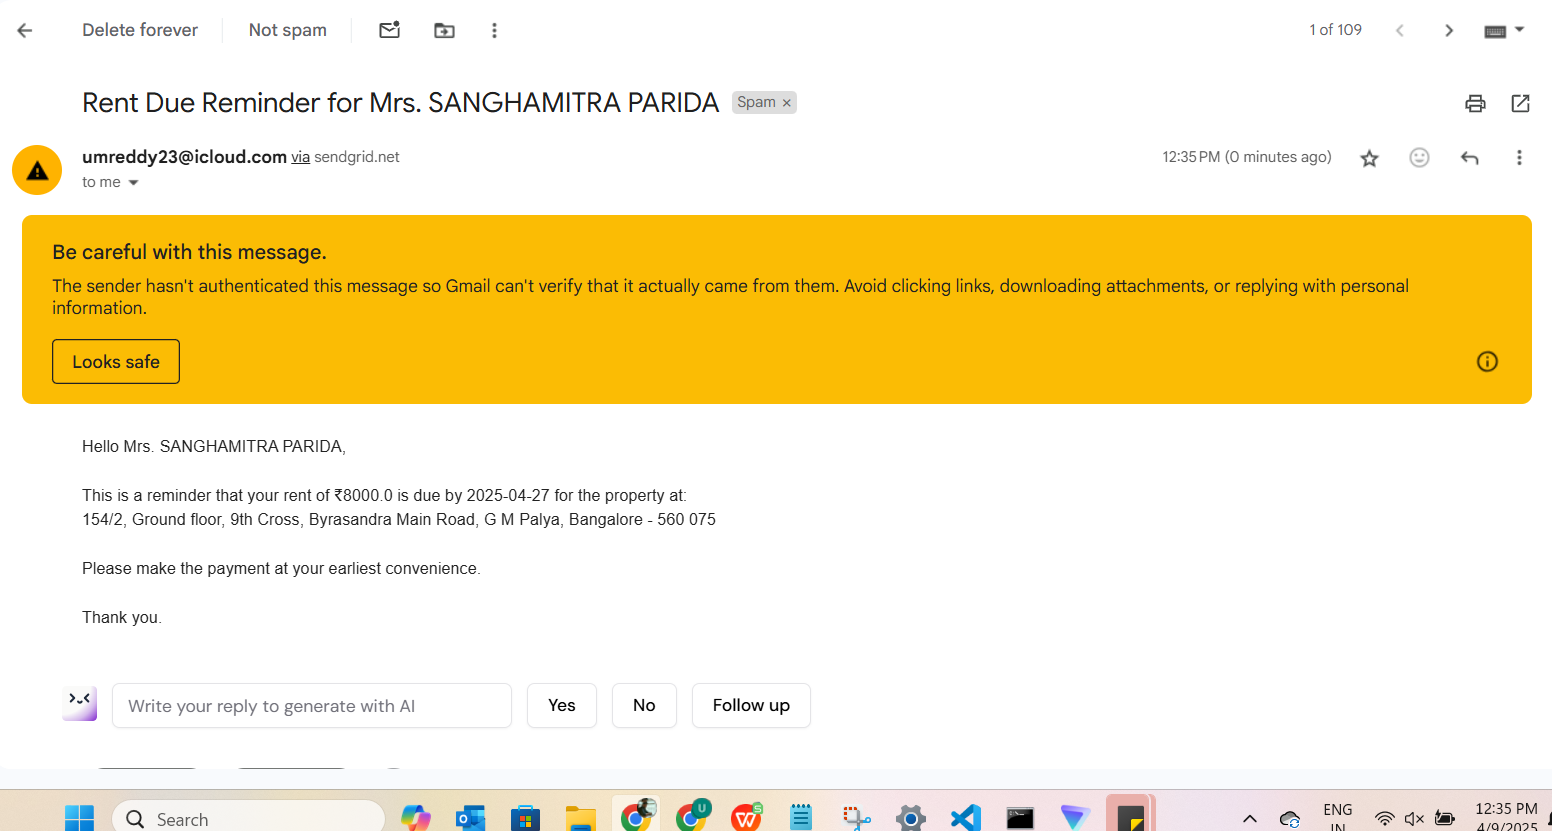](http://)